# Mock Loan dataset by CTAB-GAN-PLUS
### ***Introduction***
CTAB-GAN+ is a conditional GAN based tabular data generator. CTAB-GAN+ advances beyond SOTA methods by improving performance on regression datasets and allowing control over the quality of synthesized data. The core features ofCTAB-GAN+ include as follows:    
- (1) introduction of the auxiliary component, i.e., classifier or regressor, into conditional GAN;    
- (2) effective data encodings for mixed and simple Guassian variables;    
- (3) a novel construction of conditional vectors;    
- (4) tailored DP discriminator for tabular GAN.     

Loan dataset is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.        
### ***Our work***   
We use CTAB-GAN+ to simulate Loan data and visualize real and fake data. See code, comments, and diagrams for details.             
### ***Reference:***
[1] Sunil Jacob (2024). Bank_Loan_modelling [Dataset]. Kaggle Repository. Available: https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling/data   
[2] Z. Zhao, A. Kunar, R. Birke, H. Van der Scheer, and L. Y. Chen, “CTAB-GAN+: Enhancing Tabular Data Synthesis,” Frontiers in big Data, vol. 6, p. 1296508, 2024.

***Time ： 2024/11/25 20:39***  
***Author ： Chuang Liu***  
***Email ：LIUC0316@126.COM***  
***File ：Loan_Mocking_Plus.ipynb***  
***Notebook ：Jupyter***   

In [1]:
# Importing the model
from model.ctabgan import CTABGAN
# Importing the evaluation metrics 
from model.eval.evaluation import get_utility_metrics,stat_sim,privacy_metrics
# Importing standard libraries
import numpy as np
import pandas as pd
import glob

In [2]:
# Specifying the replication number 
num_exp = 5 
# Specifying the name of the dataset used 
dataset = "Loan" 
# Specifying the path of the dataset used 
real_path = "Real_Datasets/Loan/Loan.csv" 
# Specifying the root directory for storing generated data
fake_file_root = "Fake_Datasets" 

In [3]:
# Initializing the synthesizer object and specifying input parameters
# Notice: If you have continuous variable, you do not need to explicitly assign it. It will be treated like 
# that by default
synthesizer =  CTABGAN(raw_csv_path = real_path,
                 test_ratio = 0.20,  
                 categorical_columns = ['Family', 'Education', 'CreditCard', 'Securities Account',
                                        'CD Account', 'Online', 'Personal Loan'], 
                 log_columns = [],
                 mixed_columns= {'Mortgage':[0.0]}, 
                 general_columns= ['Income'],
                 non_categorical_columns= ['CCAvg'],
                 integer_columns = ['Age', 'Experience', 'ZIP Code', 'Mortgage'],
                 problem_type= {"Classification": 'Personal Loan'}) 

# Fitting the synthesizer to the training dataset and generating synthetic data
synthesizer.fit()
for i in range(num_exp):
    syn = synthesizer.generate_samples()
    syn.to_csv(fake_file_root+"/"+dataset+"/"+ dataset+"_fake_{exp}.csv".format(exp=i), index= False)

100%|██████████████████████████████████████████████████████████████████████████████| 300/300 [1:35:42<00:00, 19.14s/it]


Finished training in 5744.779873609543  seconds.


In [4]:
# Collecting the paths to all corresponding generated datasets for evaluation 
fake_paths = glob.glob(fake_file_root+"/"+dataset+"/"+"*")

In [5]:
# Specifying the list of classifiers to conduct ML utility evaluation
model_dict =  {"Classification":["lr","dt","rf","mlp","svm"]}
result_mat = get_utility_metrics(real_path,fake_paths,"MinMax",model_dict, test_ratio = 0.20)

# Storing and presenting the results as a dataframe
result_df  = pd.DataFrame(result_mat,columns=["Acc","AUC","F1_Score"])
result_df.index = list(model_dict.values())[0]
result_df

,Acc,AUC,F1_Score
lr,1.26,0.002579,0.077810
dt,6.56,0.196423,0.185231
rf,2.88,0.025158,0.107105
mlp,2.28,0.011285,0.082985
svm,2.90,0.014901,0.128345


In [6]:
# Specifying the categorical columns of the dataset used
adult_categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
stat_res_avg = []
for fake_path in fake_paths:
    stat_res = stat_sim(real_path,fake_path,adult_categorical)
    stat_res_avg.append(stat_res)

# Storing and presenting the results as a dataframe
stat_columns = ["Average WD (Continuous Columns","Average JSD (Categorical Columns)","Correlation Distance"]
stat_results = pd.DataFrame(np.array(stat_res_avg).mean(axis=0).reshape(1,3),columns=stat_columns)
stat_results

column:  Age WD:  0.007309090909090914
column:  Experience WD:  0.01098260869565218
column:  Income WD:  0.011045450123151149
column:  ZIP Code WD:  0.0015901149477926388
column:  Family WD:  0.031066666666666652
column:  CCAvg WD:  0.008509855348202778
column:  Education WD:  0.01579999999999998
column:  Mortgage WD:  0.015537007874015749
column:  CreditCard WD:  0.010000000000000009
column:  Securities Account WD:  0.020400000000000085
column:  CD Account WD:  0.01639999999999997
column:  Online WD:  0.006000000000000005
column:  Personal Loan WD:  0.017799999999999927
column:  Age WD:  0.00945000000000001
column:  Experience WD:  0.016108695652173915
column:  Income WD:  0.011344198117432775
column:  ZIP Code WD:  0.001481912896134832
column:  Family WD:  0.03726666666666668
column:  CCAvg WD:  0.007960612901019846
column:  Education WD:  0.014900000000000024
column:  Mortgage WD:  0.010001259842519681
column:  CreditCard WD:  0.020399999999999974
column:  Securities Account WD:  0.

,Average WD (Continuous Columns,Average JSD (Categorical Columns),Correlation Distance
0,0.013806,NaN,0.471078


In [7]:
# Storing and presenting the results as a dataframe
priv_res_avg = []
for fake_path in fake_paths:
    priv_res = privacy_metrics(real_path,fake_path)
    priv_res_avg.append(priv_res)
    
privacy_columns = ["DCR between Real and Fake (5th perc)","DCR within Real(5th perc)","DCR within Fake (5th perc)","NNDR between Real and Fake (5th perc)","NNDR within Real (5th perc)","NNDR within Fake (5th perc)"]
privacy_results = pd.DataFrame(np.array(priv_res_avg).mean(axis=0).reshape(1,6),columns=privacy_columns)
privacy_results

,DCR between Real and Fake (5th perc),DCR within Real(5th perc),DCR within Fake (5th perc),NNDR between Real and Fake (5th perc),NNDR within Real (5th perc),NNDR within Fake (5th perc)
0,0.683322,0.603615,0.651268,0.55099,0.49235,0.546563


In [8]:
# Storing generated data for future use if needed
# syn.to_csv(fake_file_root+"/"+dataset+"/"+ dataset+"_fake_{exp}.csv".format(exp=i), index= False)

In [9]:
from table_evaluator import TableEvaluator

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   CreditCard          5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns)

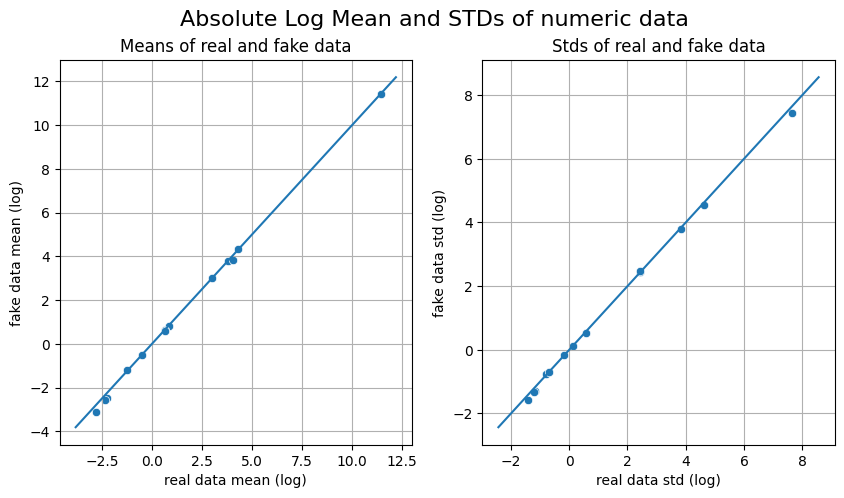

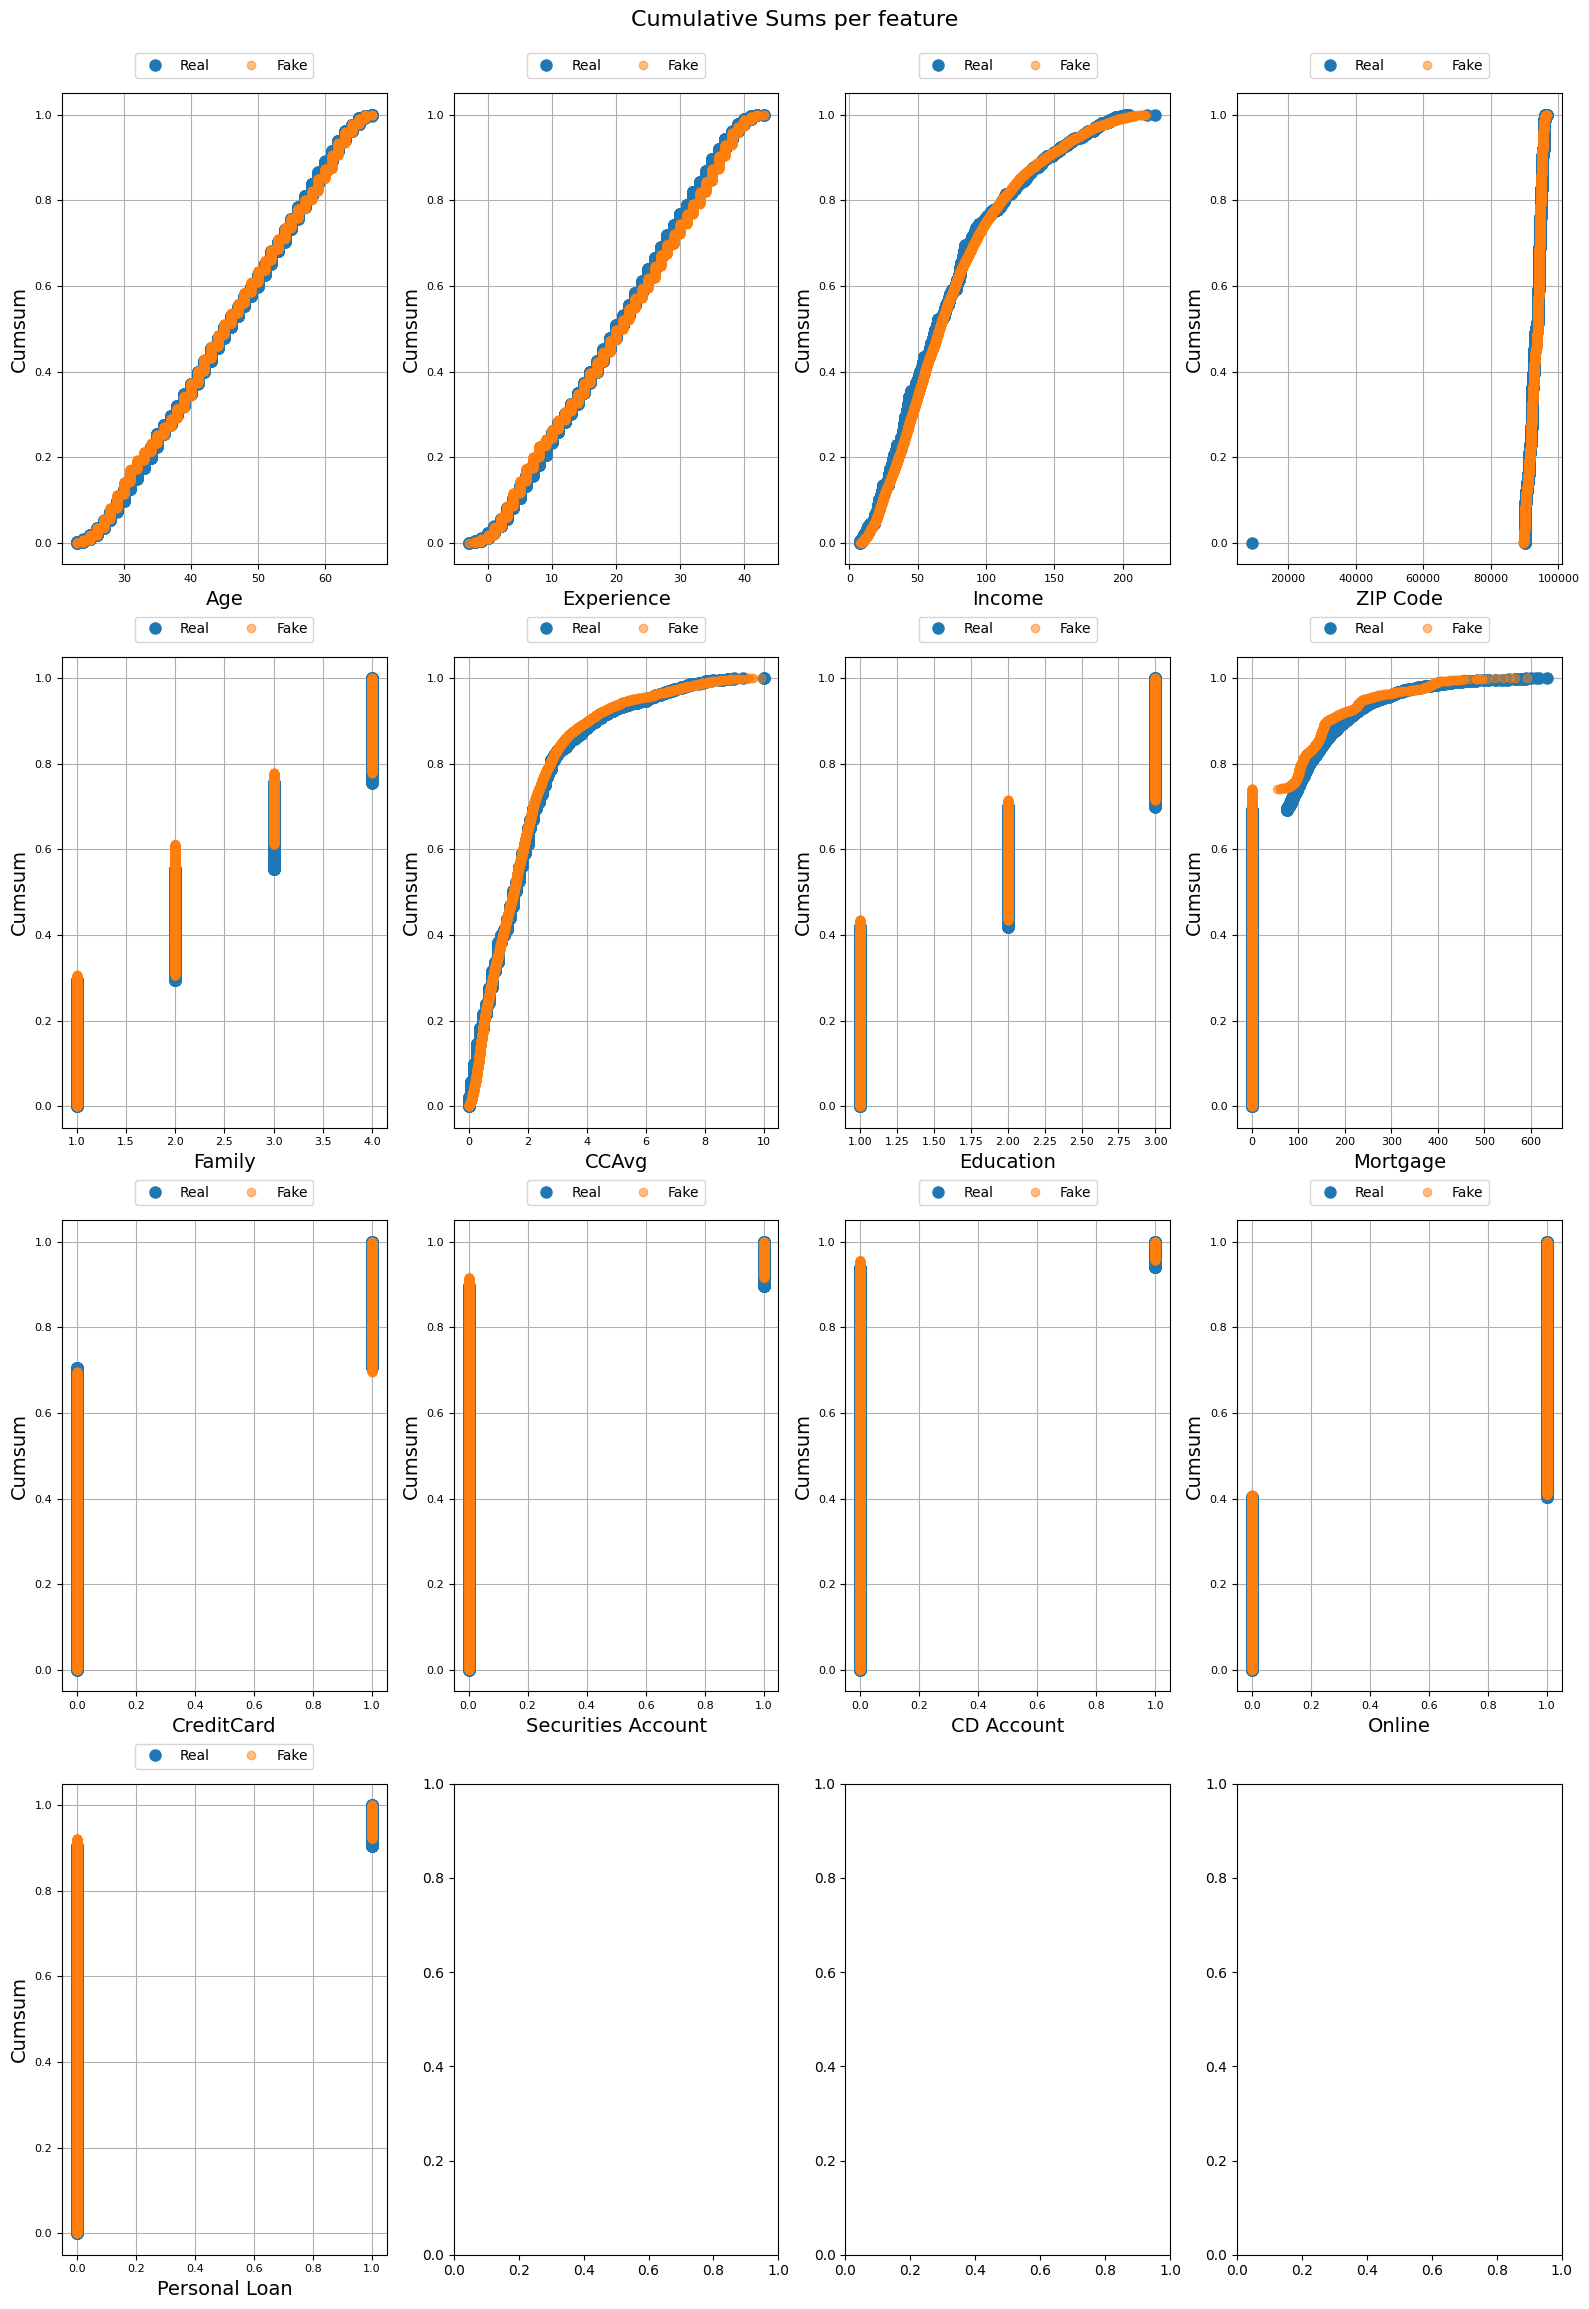

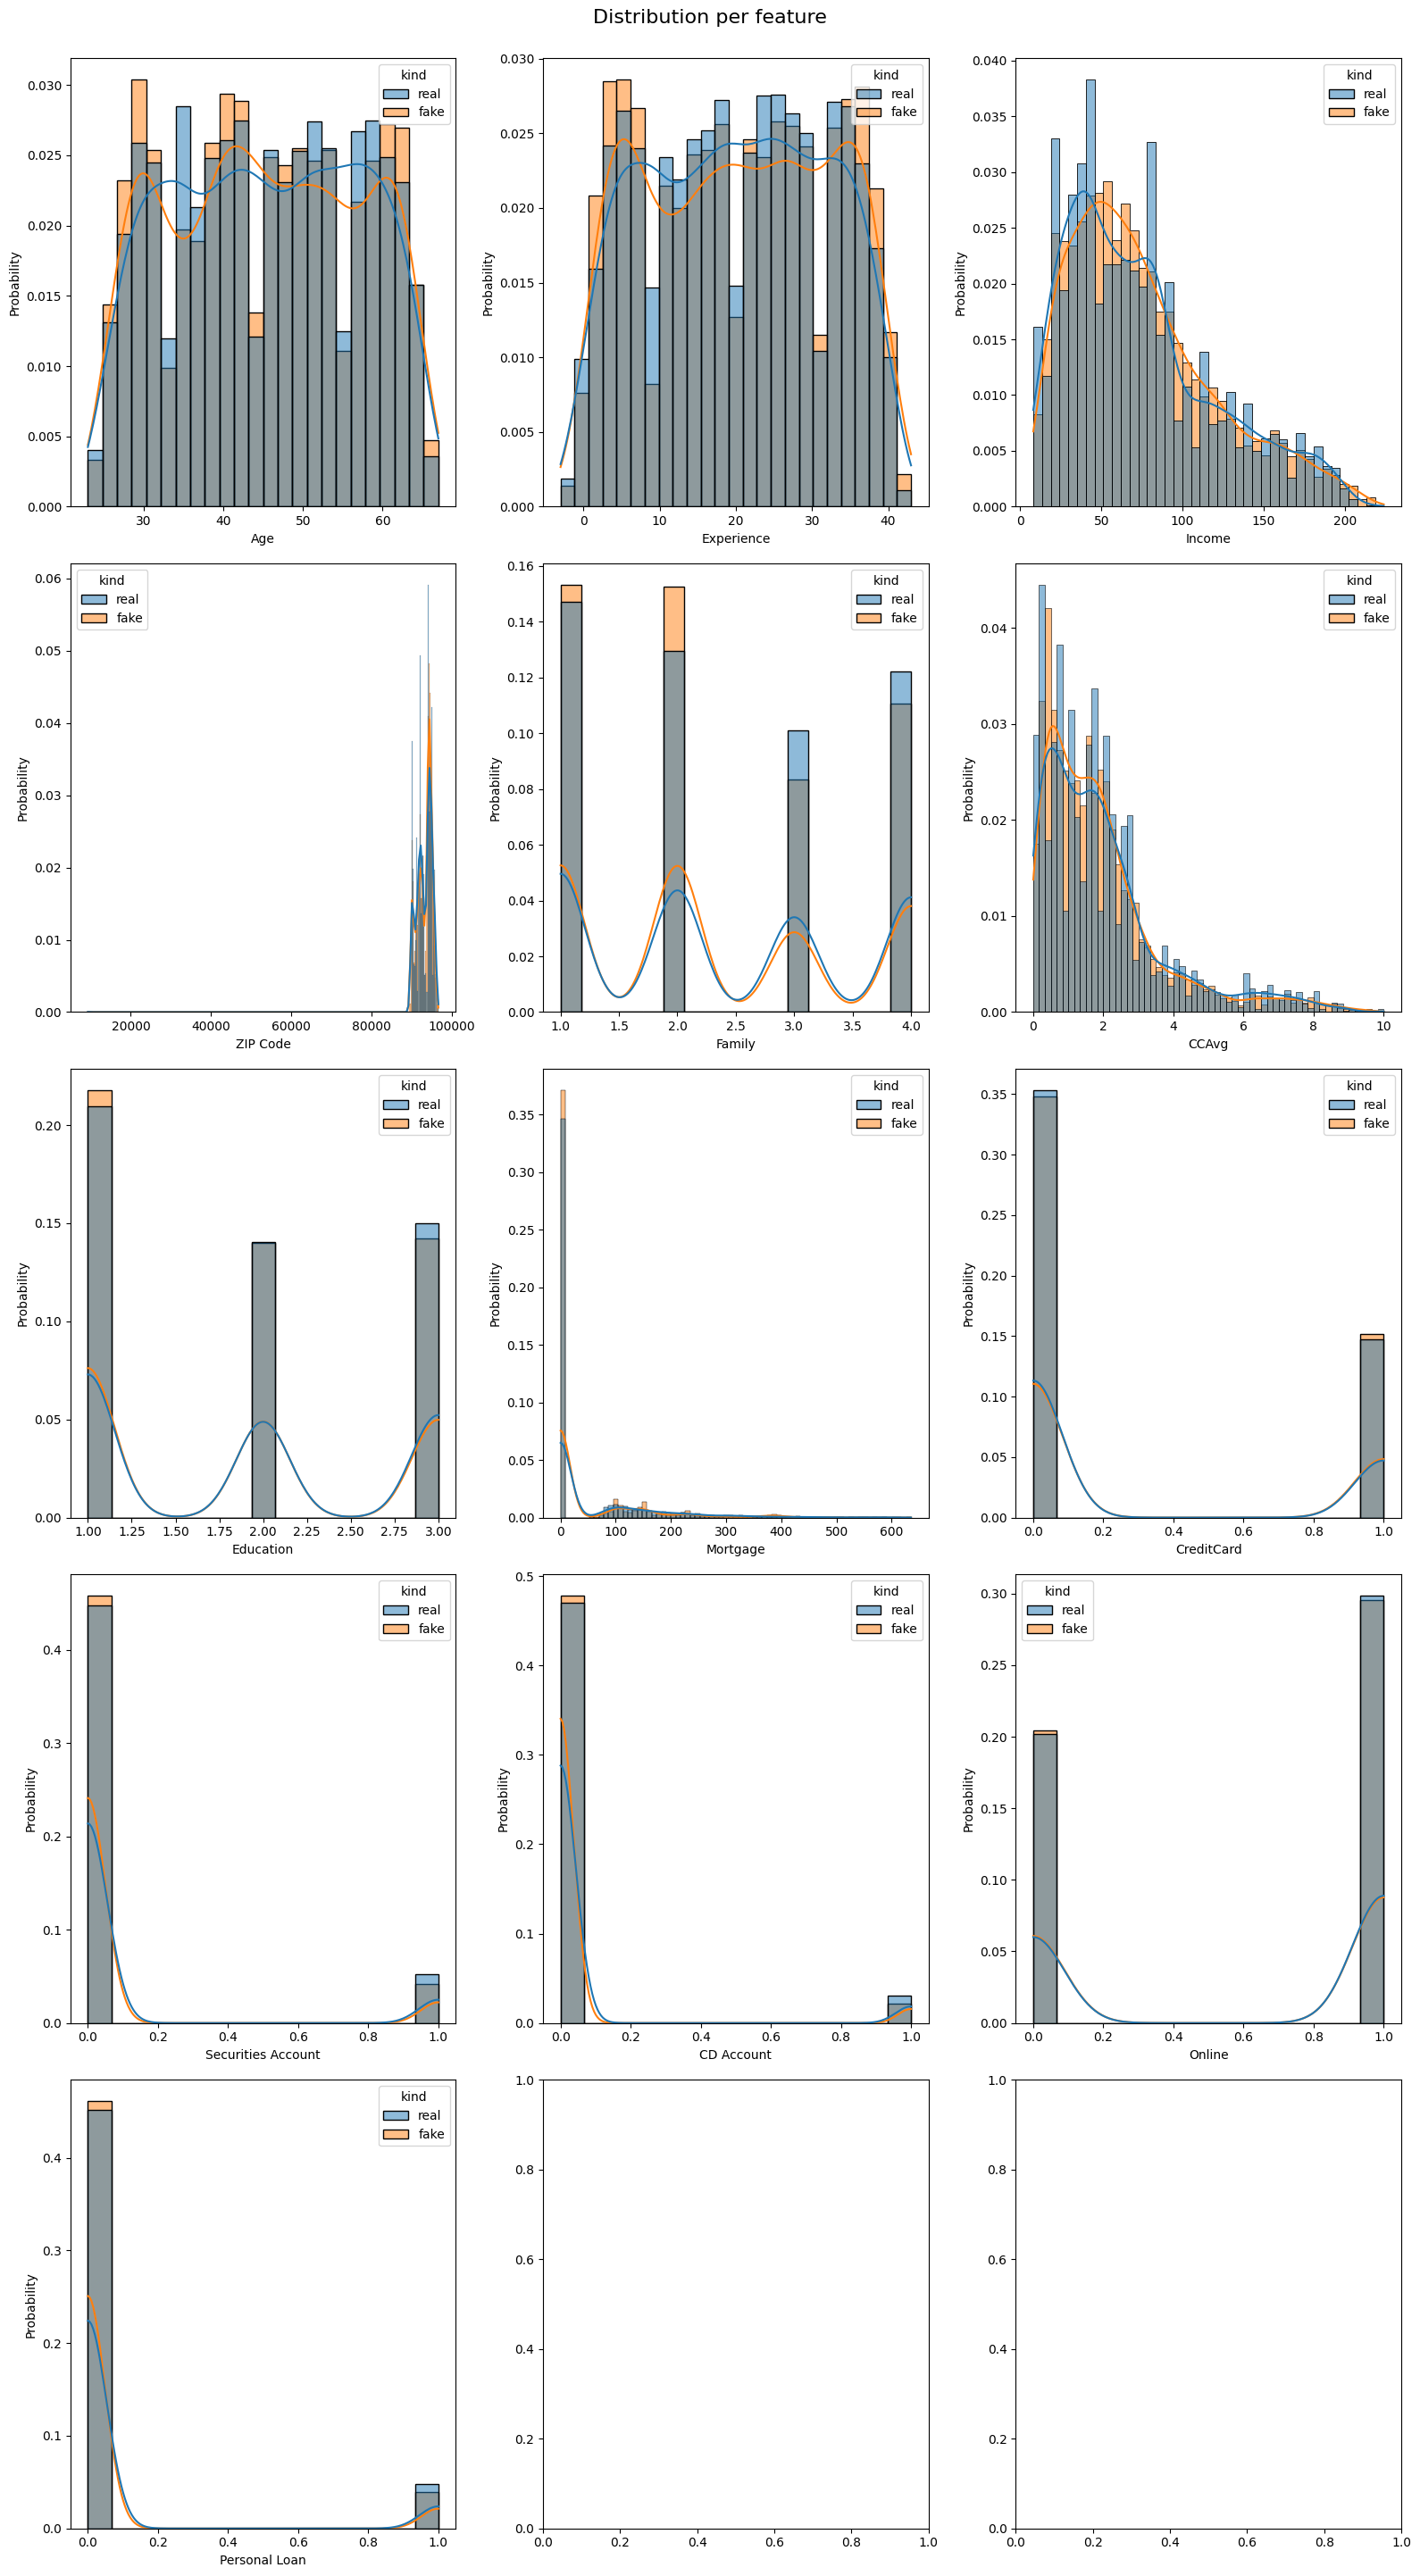

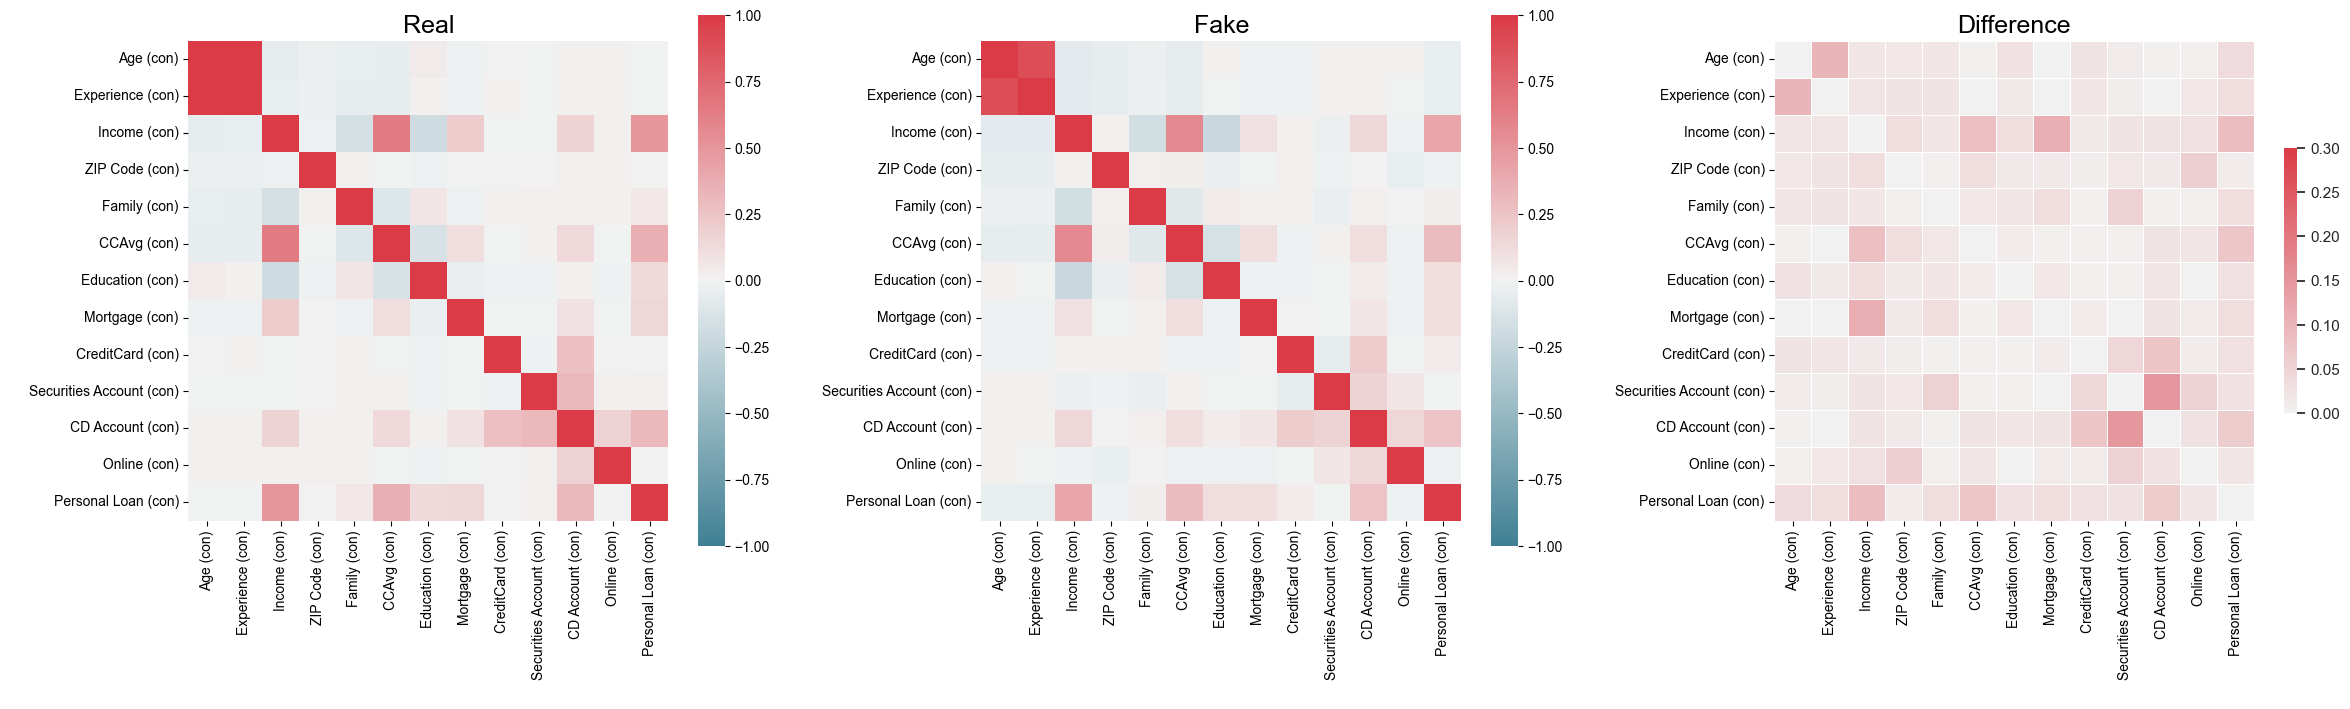

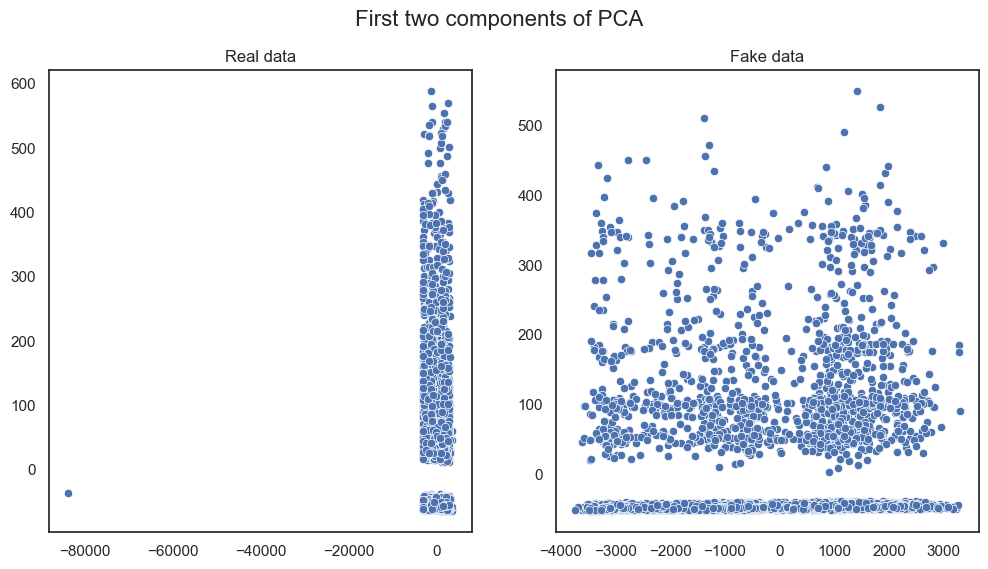

In [10]:
!pip install scipy==1.11.4
Real_Dataset = pd.read_csv('Real_Datasets/Loan/Loan.csv')
Fake_Dataset = pd.read_csv('Fake_Datasets/Loan/Loan_fake_0.csv')

Real_Dataset.head()
Real_Dataset.info()
Fake_Dataset.head()
Fake_Dataset.info()

print(Real_Dataset.shape, Fake_Dataset.shape)
table_evaluator = TableEvaluator(Real_Dataset, Fake_Dataset)

table_evaluator.visual_evaluation()